In [8]:
#Netflix price dataset
#importing the necessary Libraries for importing the dataset in jupiter notebook
#100M ratings 17770 movies 480000 users 4 dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Reading dataset file
netflix_dataset = pd.read_csv('/content/drive/MyDrive/Pjt/netflix pjt/combined_data_1.txt.zip' ,header = None,names = ['Cust_id','Rating'], usecols =[0,1])
netflix_dataset

,Cust_id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [11]:
netflix_dataset.iloc[545:570,:]

,Cust_id,Rating
545,1535440,4.0
546,1426604,4.0
547,1815755,5.0
548,2:,NaN
549,2059652,4.0
550,1666394,3.0
551,1759415,4.0
552,1959936,5.0
553,998862,4.0
554,2625420,2.0


In [55]:
netflix_dataset.tail()


,Cust_id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [12]:
netflix_dataset.isnull().sum()


,0
Cust_id,0
Rating,4499


In [15]:
netflix_dataset.dtypes


,0
Cust_id,object
Rating,float64


In [16]:
netflix_dataset.shape


(24058263, 2)

In [17]:
#To calculate how many movies we are having in the data set
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count["Rating"]

In [19]:
movie_count

4499

In [18]:
#Get the customer count with nan values
customer_count=netflix_dataset['Cust_id'].nunique()

In [20]:
customer_count   #this also includes the movie id

475257

In [21]:
#without NAN values
customer_count=customer_count-movie_count
customer_count

470758

In [22]:
#get the no of ratings given by the customers
rating_count=netflix_dataset['Cust_id'].count()-movie_count
rating_count

24053764

In [23]:
#To find out howmany people have rated the movies as 1,2,3,4,5 stars ratingab to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [24]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


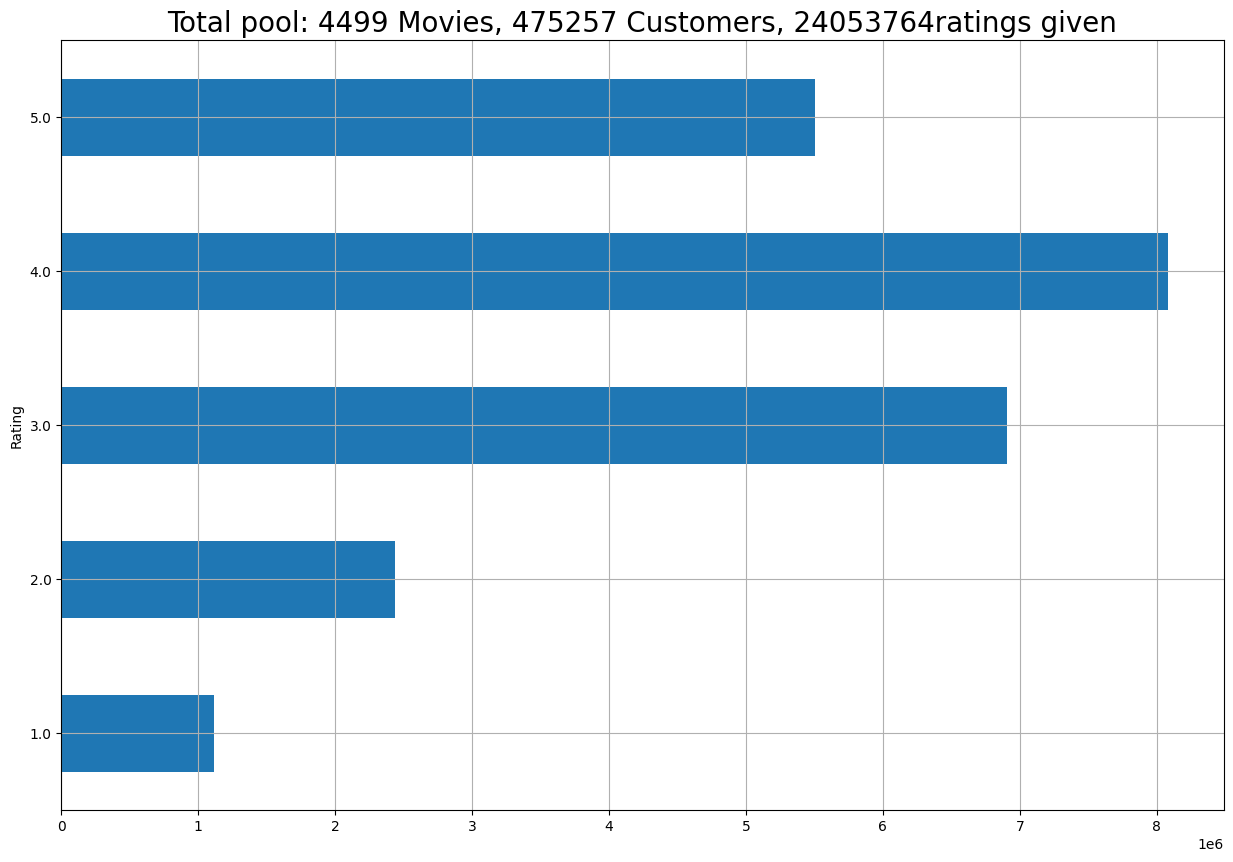

In [66]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count}ratings given', fontsize=20)
plt.grid(True)

In [25]:
#add another column that will have movie id
# first of all we will be calculating howmany null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [26]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [27]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [28]:

df_nan.shape


(4499, 1)

In [29]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [30]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [31]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()

In [32]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [33]:
#now we will create anumpy array that will contain 1 values 0 to 547, 2 from 548 to 693 and so on
movie_np=[]
movie_id=1
for i,j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
  temp=np.full((1,i-j-1), movie_id)
  movie_np=np.append(movie_np, temp)
  movie_id+=1
 #  account for last record and corressponding length
 # numpy approach
last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1),movie_id)# movie id will be 4499
movie_np=np.append(movie_np, last_record)
print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

#movie_np=[]
#movie_id=1
#for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
#temp=np.full(-1,i-j-1),movie_id)
#movie_np=np.append(movie_np, temp)
# movie_id+=1
#last_record=np.full((1,len(netflix_dataset)-df_nan.iloc[-1,0]-1),movie_id)


Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [34]:
df_nan['index'][1:]

,index
1,548
2,694
3,2707
4,2850
5,3991
...,...
4494,24046714
4495,24047329
4496,24056849
4497,24057564


In [37]:
df_nan.iloc[-1,0]-1


24057833

In [38]:
len(netflix_dataset)


24058263

In [39]:
#working
x=zip(df_nan['index'][1:], df_nan['index'][:-1])

In [40]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [41]:
temp=np.full((1,547),1)

In [42]:
print(temp)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [43]:
netflix_dataset=netflix_dataset[pd.notnull( netflix_dataset['Rating'])]
netflix_dataset['movie_id']=movie_np.astype(int)

netflix_dataset['Cust_id']=netflix_dataset['Cust_id'].astype(int)
print("Now the data set look like:")
netflix_dataset.head(300)


<ipython-input-43-23834be84bc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['movie_id']=movie_np.astype(int)


Now the data set look like:


<ipython-input-43-23834be84bc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_id']=netflix_dataset['Cust_id'].astype(int)


,Cust_id,Rating,movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
296,1343170,5.0,1
297,2565752,4.0,1
298,435841,3.0,1
299,2242821,5.0,1


In [44]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
f=['count','mean']

In [45]:
dataset_movie_summary=netflix_dataset.groupby('movie_id').agg(f)

In [46]:
dataset_movie_summary

Cust_id               Rating          
           count          mean  count      mean
movie_id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [47]:
dataset_movie_summary=netflix_dataset.groupby('movie_id')['Rating'].agg(f)

In [48]:
dataset_movie_summary

,count,mean
movie_id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [49]:
#now create a bench mark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [50]:
dataset_movie_summary['count']

,count
movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [51]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='movie_id', length=3149)

In [52]:
#now remove all the users that are inactive
dataset_cust_summary=netflix_dataset.groupby('Cust_id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [53]:
# now we will store all the movie_id indexes in a variable dataset_summary.index and convert the datatype to int
dataset_cust_summary.index=dataset_cust_summary.index.map(int)

In [54]:
# now create the benchmark
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [55]:
dataset_movie_summary['count']

,count
movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [56]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_id', length=327300)

In [57]:
#we remove all the customers and movies that are below benchmarks
print('The orginal dataframe has:',netflix_dataset.shape,'shape')

The orginal dataframe has: (24053764, 3) shape


In [58]:
netflix_dataset=netflix_dataset[~netflix_dataset['movie_id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_id'].isin(drop_cust_list)]
print('After the triming the shape is:{}'.format(netflix_dataset.shape))

After the triming the shape is:(17337458, 3)


In [59]:
netflix_dataset.head()

,Cust_id,Rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [60]:
import pandas as pd


In [61]:
df_title=pd.read_csv("/content/drive/MyDrive/Pjt/netflix pjt/movie_titles _1_.csv", encoding = 'ISO-8859-1',header=None,usecols=[0,1,2], names = ['movie_id', 'Year', 'Name'])
df_title.set_index('movie_id',inplace=True)

In [62]:
df_title.head(10)

,Year,Name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [63]:
#model building
!pip install scikit-surprise


In [64]:
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [65]:
#help us to read the data set for svd algo
reader=Reader()


In [66]:
# we only work with top 100k rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_id','movie_id','Rating']][:100000],reader)

In [67]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3, verbose=True)
#for first fold-1,2,3,4,5

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9973  0.9930  1.0037  0.9980  0.0044  
MAE (testset)     0.8038  0.8030  0.8070  0.8046  0.0017  
Fit time          4.14    2.42    1.55    2.70    1.07    
Test time         0.86    0.36    0.33    0.52    0.24    


{'test_rmse': array([0.99734518, 0.99297898, 1.0036894 ]),
 'test_mae': array([0.8038231 , 0.80298378, 0.80699455]),
 'fit_time': (4.1378443241119385, 2.420431613922119, 1.5516891479492188),
 'test_time': (0.86102294921875, 0.36477136611938477, 0.3316173553466797)}

In [68]:
netflix_dataset.head()


,Cust_id,Rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [69]:
#so first we take user 712664 and we try to recommend some movies based on the past data
#He Rated so many movies with 5 star
dataset_712664=netflix_dataset[(netflix_dataset['Cust_id']==712664)&(netflix_dataset['Rating']==5)]
dataset_712664=dataset_712664.set_index('movie_id')
dataset_712664=dataset_712664.join(df_title)['Name']
dataset_712664

,Name
movie_id,
3,Character
79,The Killing
175,Reservoir Dogs
199,The Deer Hunter
241,North by Northwest
...,...
3887,Aguirre: The Wrath of God
4109,American Psycho
4266,The Passion of the Christ


In [70]:
#now build the recommendation algorithm
#fFirst will make the shallow copy of movie_titles.csv file so that we can change
#The values in the copied dataset,not in the actual data set
user_712664=df_title.copy()
user_712664

,Year,Name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [71]:
user_712664=user_712664.reset_index()
user_712664

,movie_id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [72]:
user_712664=user_712664[~user_712664['movie_id'].isin( drop_movie_list )]
user_712664

,movie_id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [78]:
import math
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate #k- fold

In [74]:
# now will train our algorithm with the whole dataset
data=Dataset.load_from_df(netflix_dataset[['Cust_id','movie_id','Rating']],reader)

In [75]:
# Building the trainset using surprise package
trainset=data.build_full_trainset()
svd.fit(trainset)

In [76]:
user_712664['Estimate_score']=user_712664['movie_id'].apply(lambda x: svd.predict(712664,x).est)
user_712664=user_712664.drop('movie_id',axis=1)

<ipython-input-76-06899c873dae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_score']=user_712664['movie_id'].apply(lambda x: svd.predict(712664,x).est)


In [82]:
user_712664=user_712664.sort_values('Estimate_score')
print(user_712664)

        Year                                   Name  Estimate_score
1601  2000.0                     Dungeons & Dragons        1.000000
1288  1990.0                 Look Who's Talking Too        1.000000
2336  1997.0                            Double Team        1.000000
361   2000.0     The Flintstones in Viva Rock Vegas        1.076728
2971  2002.0                      American Psycho 2        1.096312
...      ...                                    ...             ...
3443  2004.0  Family Guy: Freakin' Sweet Collection        5.000000
721   2003.0                     The Wire: Season 1        5.000000
3289  1974.0                          The Godfather        5.000000
3167  1987.0              Evil Dead 2: Dead by Dawn        5.000000
174   1992.0                         Reservoir Dogs        5.000000

[14621 rows x 3 columns]


In [81]:
user_712664=user_712664.sort_values('Estimate_score',ascending=False)
print(user_712664.head(10))

        Year                                   Name  Estimate_score
174   1992.0                         Reservoir Dogs        5.000000
3167  1987.0              Evil Dead 2: Dead by Dawn        5.000000
3289  1974.0                          The Godfather        5.000000
721   2003.0                     The Wire: Season 1        5.000000
3443  2004.0  Family Guy: Freakin' Sweet Collection        5.000000
871   1954.0                          Seven Samurai        5.000000
3853  1955.0                          Night and Fog        5.000000
67    2004.0                            Invader Zim        5.000000
560   1963.0                           High and Low        4.940877
2018  2004.0                       Samurai Champloo        4.927357
